# Nearest Neighbors regression / 最近邻回归

Demonstrate the resolution of a regression problem
using a k-Nearest Neighbor and the interpolation of the
target using both barycenter and constant weights.<br>
演示使用 k-最近邻解决回归问题的方法
以及使用重心和恒定权重对目标进行插值的方法。

In [ ]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Fabian Pedregosa <fabian.pedregosa@inria.fr>
#
# License: BSD 3 clause (C) INRIA

## Generate sample data / 生成示例数据
Here we generate a few data points to use to train the model. We also generate
data in the whole range of the training data to visualize how the model would
react in that whole region.<br>
在这里，我们生成一些数据点来用于训练模型。我们还生成整个训练数据范围内的数据，以可视化模型在整个区域内的反应。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import neighbors

rng = np.random.RandomState(0)
X_train = np.sort(5 * rng.rand(40, 1), axis=0)
X_test = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X_train).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

## Fit regression model / 拟合回归模型
Here we train a model and visualize how `uniform` and `distance`
weights in prediction effect predicted values.<br>
在这里，我们训练一个模型，并直观地展示预测中的`均匀`和`距离`权重如何影响预测值。

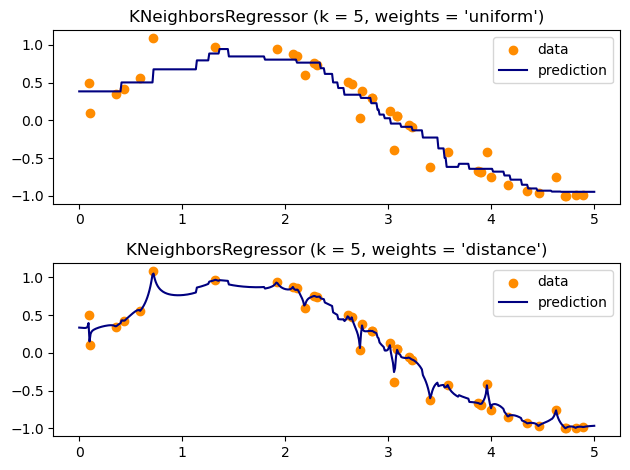

In [2]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X_train, y).predict(X_test)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X_train, y, color="darkorange", label="data")
    plt.plot(X_test, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()